In [3]:
import csv
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')


# para pintar
import pylab as plt
import seaborn as sns

#para que salga el grafico
%matplotlib inline

In [2]:
%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



In [16]:
df = pd.read_csv(r'/Users/Ari/desktop/ironhack/Proyec-1-Pandas-Shark-attacks/cleanattacks.csv') 

In [21]:
df.columns

Index(['case_number', 'year', 'typess', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatality', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula',
       'original_order'],
      dtype='object')

In [17]:
df.head()

,case_number,year,typess,country,area,location,activity,name,sex_,age,injury,fatality,time,species_,investigator_or_source,pdf,href_formula,original_order
0,2018.06.25,2018,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,No Injury,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing in water,Adyson�McNeely,F,11,Minor Injury,N,14h00 -15h00,other_specie,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,2018,Invalid,USA,Hawaii,"Habush, Oahu",other,John Denges,M,48,Injury in leg,N,07h45,other_specie,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,other,Unkwnon,M,Unknown,Minor Injury,N,Unknown,other_specie,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,2018,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,Unknown,Laceration,N,Unknown,Tiger shark,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0


voy a reducir el numero de columnas a las que me interesan para mi hipótesis...asi trabajaré con menos carga

In [22]:
df=df[['country','area','activity','sex_','species_','fatality']]

In [42]:
df.country.value_counts()

USA                      2229
AUSTRALIA                1338
SOUTH AFRICA              579
PAPUA NEW GUINEA          134
NEW ZEALAND               128
                         ... 
ARGENTINA                   1
THE BALKANS                 1
NORTH ATLANTIC OCEAN        1
MAYOTTE                     1
CEYLON (SRI LANKA)          1
Name: country, Length: 207, dtype: int64

# Defendiendo mi hipótesis:

Mi hipótesis defiende que:

-El país en el que más ataques de tiburones se producen en en EEUU, concretamente en el area de Florida.

-Que se producen más ataques a hombres que a mujeres.

-Que el tiburon más agresivo y depredador es el White Shark.


# 1. Asegurar mi hipótesis sobre los ataques en USA y en el area de Florida.

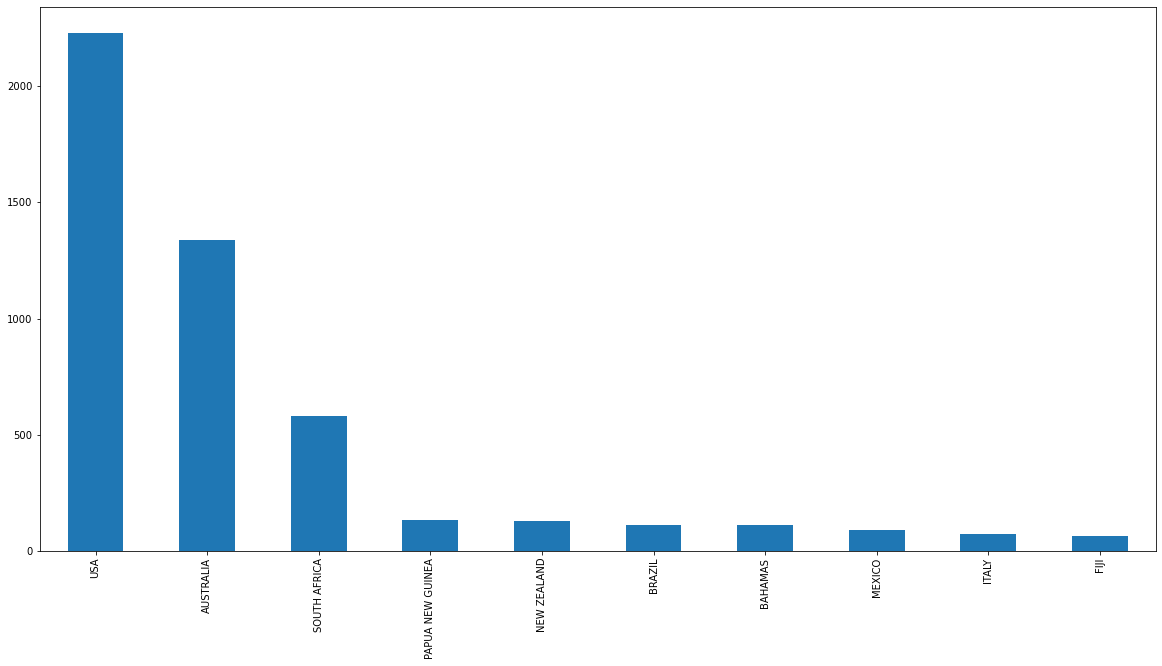

In [45]:
plt.figure(figsize=(20, 10))

df.country.value_counts()[:10].plot.bar();

In [53]:
barrios=df[df.country.str.contains('USA')]

barrios

,country,area,activity,sex_,species_,fatality
0,USA,California,Paddling,F,White shark,N
1,USA,Georgia,Standing in water,F,other_specie,N
2,USA,Hawaii,other,M,other_specie,N
7,USA,Florida,Fishing,M,Lemon shark,N
8,USA,Florida,Walking,M,Bull shark,N
...,...,...,...,...,...,...
6249,USA,Florida,Standing in water,M,other_specie,N
6283,USA,Florida,Fishing,M,other_specie,N
6288,USA,North Carolina,Swimming,M,other_specie,N
6292,USA,Hawaii,other,F,other_specie,N


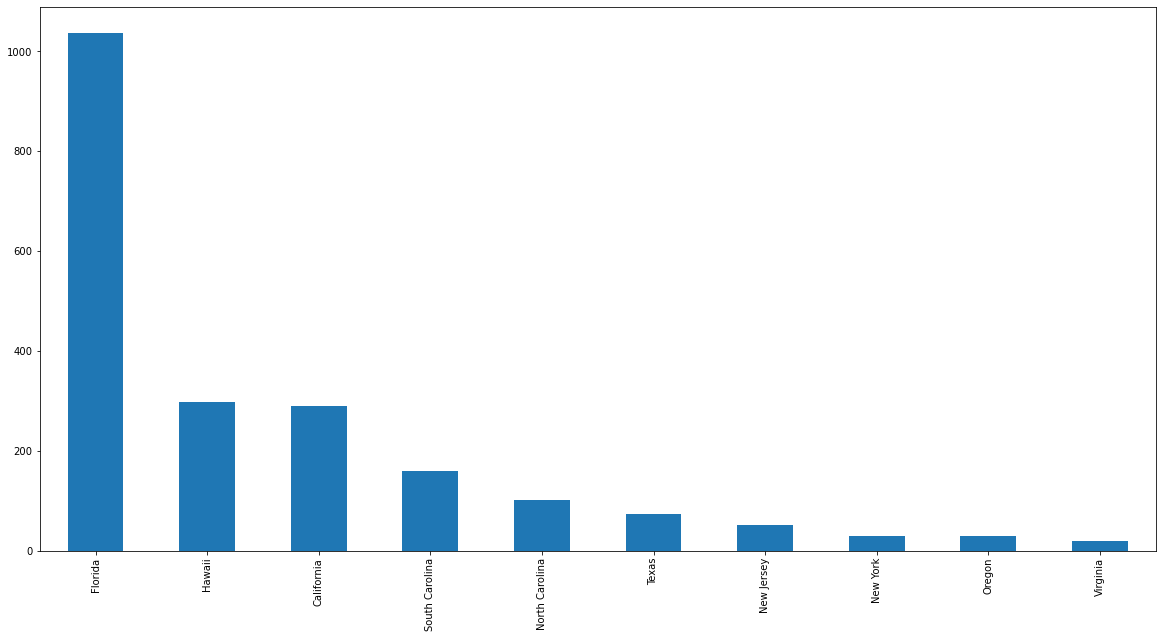

In [54]:
plt.figure(figsize=(20, 10))

barrios.area.value_counts()[:10].plot.bar();

# 2. Asegurar que se dan más ataques en hombres que mujeres.

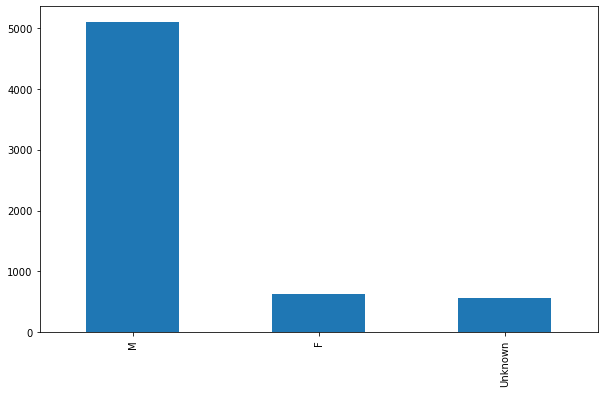

In [56]:
plt.figure(figsize=(10, 6))

df.sex_.value_counts().plot.bar();

In [71]:
afectados=df[df.country.str.contains('USA')]
afectados.head()

,country,area,activity,sex_,species_,fatality
0,USA,California,Paddling,F,White shark,N
1,USA,Georgia,Standing in water,F,other_specie,N
2,USA,Hawaii,other,M,other_specie,N
7,USA,Florida,Fishing,M,Lemon shark,N
8,USA,Florida,Walking,M,Bull shark,N


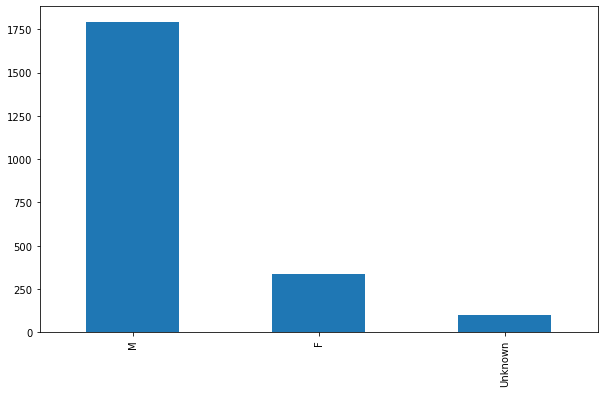

In [72]:
plt.figure(figsize=(10, 6))

afectados.sex_.value_counts().plot.bar();

# 3. Asegurar que el tiburon mas agresivo es  el white shark.

In [79]:
df_sharks = df[(df["species_"] != "other_specie")] 
df_sharks

,country,area,activity,sex_,species_,fatality
0,USA,California,Paddling,F,White shark,N
4,MEXICO,Colima,Diving,M,Tiger shark,N
6,BRAZIL,Pernambuco,Swimming,M,Tiger shark,Y
7,USA,Florida,Fishing,M,Lemon shark,N
8,USA,Florida,Walking,M,Bull shark,N
...,...,...,...,...,...,...
6276,BELIZE,Unknown,Standing in water,M,Tiger shark,Y
6293,AUSTRALIA,Unknown,Fishing,M,Blue shark,Y
6294,AUSTRALIA,Unknown,Fishing,M,Blue shark,Y
6295,AUSTRALIA,Unknown,Fishing,M,Blue shark,Y


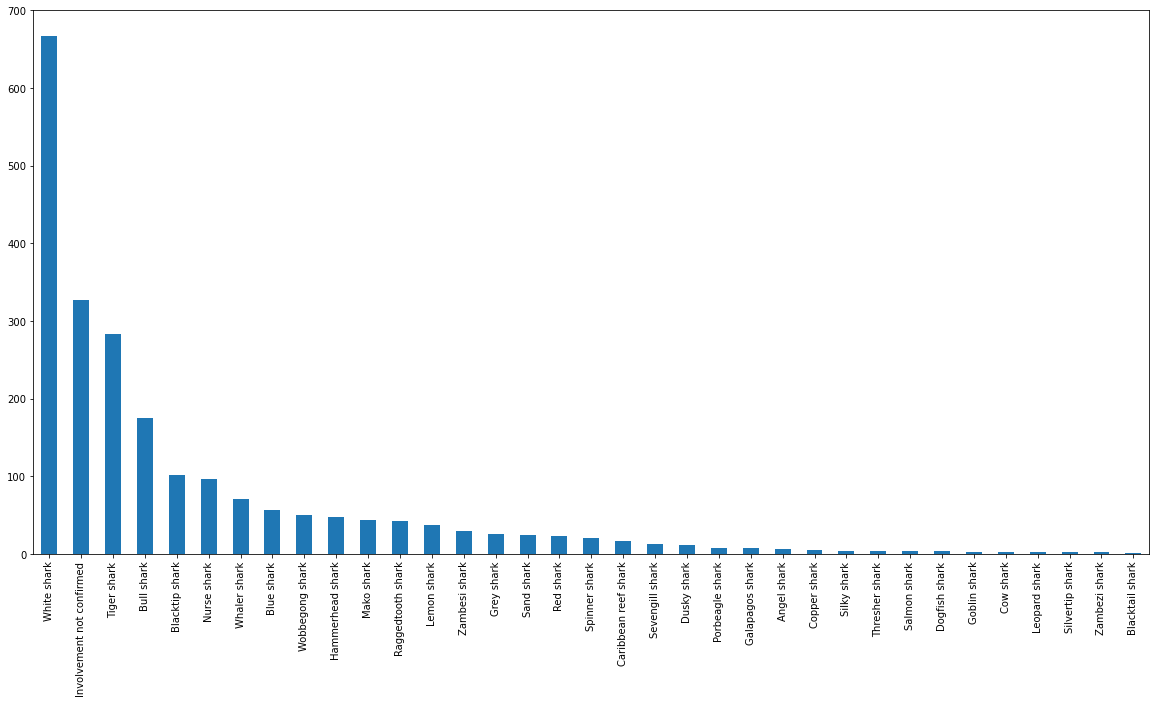

In [76]:
plt.figure(figsize=(20, 10))

df_sharks.species_.value_counts().plot.bar();

In [80]:
white=df_sharks[df_sharks.country.str.contains('USA')]
white.head()

,country,area,activity,sex_,species_,fatality
0,USA,California,Paddling,F,White shark,N
7,USA,Florida,Fishing,M,Lemon shark,N
8,USA,Florida,Walking,M,Bull shark,N
35,USA,Hawaii,Standing in water,M,Tiger shark,N
53,USA,Hawaii,other,F,Tiger shark,N


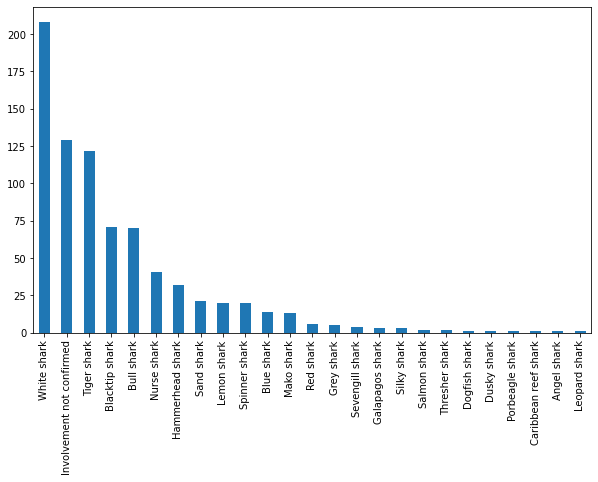

In [81]:
plt.figure(figsize=(10, 6))

white.species_.value_counts().plot.bar();

Se confirman mis hipótesis!